         Word  Count  Compound
5    hospital     96 -0.039798
49       nice     66  0.061596
61        not     54 -0.018480
32         go     48 -0.012167
78       well     48  0.030830
2        wait     42 -0.087218
14     doctor     42  0.001260
48    sisters     42  0.070996
10    waiting     36 -0.122668
28     corona     36 -0.003544
86      child     36  0.032188
179     going     30  0.063738
54       like     30  0.006649
62    allowed     30 -0.009022
33       back     30  0.074604
24      great     30  0.082392
90       good     30  0.045094
282      cunt     30 -0.163826
163    helped     30  0.004603
99      think     24  0.034653
154      came     24 -0.032665
92   children     24  0.032138
57       even     24  0.013800
199    wanted     24  0.003415
141     still     24 -0.009591
          Word  Count  Compound
284    crooked      6 -0.201740
283       nose      6 -0.201740
268     laptop      6 -0.188949
270        bag      6 -0.188949
68        ribs      6 -0.183838
71

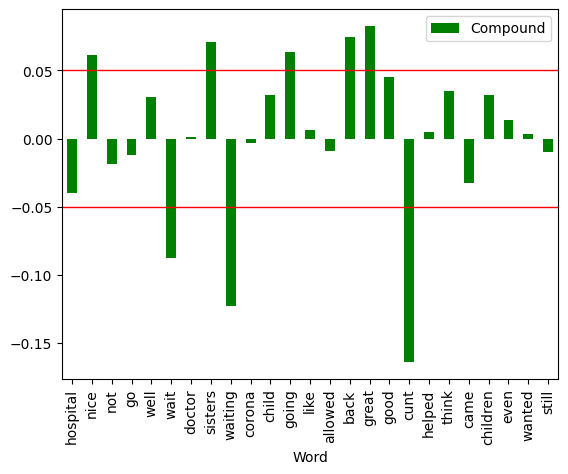

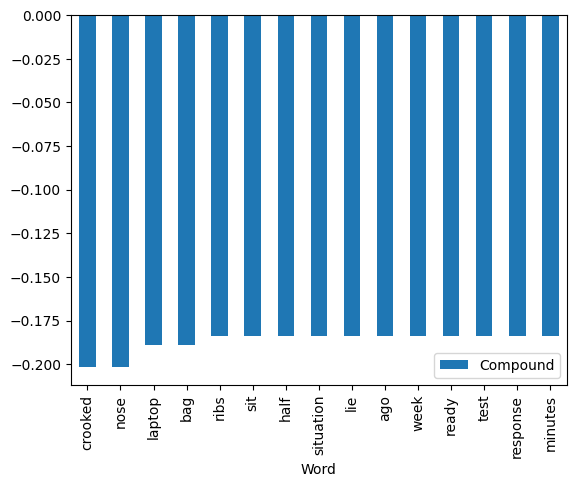

In [125]:
import pandas as pd
from deep_translator import (GoogleTranslator,
                             PonsTranslator,
                             LingueeTranslator,
                             MyMemoryTranslator,
                             YandexTranslator,
                             single_detection,
                             batch_detection)
import nltk
import string as st
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentAnalyzer
import CleanupFunctions as clean
import AddedWords
import WordsSentiment

# Haalt info uit csv op.
dfDutch = pd.read_csv("CSVFiles/Mock-updata.csv", sep=';')

dfSentiment = pd.DataFrame.from_dict({
    "id":[],
    "text": [],
    "compound": [],
    "neg":[],
    "neu":[],
    "pos":[],
})

stopwords = nltk.corpus.stopwords.words("english")

sia = SentimentIntensityAnalyzer()
# Update de woordenlijst, met zelftoegevoegde woorden en het sentiment, bron: https://ithaka.github.io/tdm-notebooks/sentiment-analysis-with-vader.html
sia.lexicon.update(AddedWords.added_words())


#Loop die er voor zorgt dat alle vertaalde reviews wordt uitgeprint
for col_name, review in dfDutch.iterrows():
    translated = GoogleTranslator(source='dutch', target='english').translate(text=dfDutch.loc[col_name]['Tekst'])
    textlowercase = clean.convert_to_lowercase(translated)
    textclean = clean.punc_clean(textlowercase)
    textstopword = clean.remove_stopword(textclean)
    tokenized = sent_tokenize(textstopword)
    for line in tokenized:     
        ss = sia.polarity_scores(line)
        compound = ss["compound"]
        dfTemp = pd.DataFrame.from_dict({
                            "id":[col_name],
                            "text": [textstopword],
                            "compound": [compound],
                            "neg":[ss["neg"]],
                            "neu":[ss["neu"]],
                            "pos":[ss["pos"]],
                            })
        index = index + 1

        WordsSentiment.words_sentiment(compound, line)
                
    dfSentiment = pd.concat([dfSentiment, dfTemp], ignore_index=True)

WordsSentiment.print_graphs()









In [21]:
dfSentimentZGV = pd.read_csv("CSVFiles\ZGVDataSentiment.csv")
dfSentimentMockUp = pd.read_csv("CSVFiles\MockUpDataSentiment.csv")

dfTotal = pd.concat([dfSentimentMockUp, dfSentimentZGV], ignore_index=True);

dfTotal.to_csv("CSVFiles/SentimentTotal.csv", sep=';')
